# Bioinformatics Project - Computational Drug Discovery - Influenza virus A matrix protein M2 - Extension - Influenza virus A Organism  
Michael Bahchevanov  
***

## Extension Notebook ▶  
This notebook is the **Machine Learning Comparison** extension notebook. Here we will be looking into the time, accuracy, and error of the most used and well-known performance-wise models. As mentioned in the previous notebook, here we will not be looking into neural networks or the RMT models.  
The goal of this notebook is to find the most performing model on our extended dataset for the *Influenza virus A Organism*.

### 1. Installing Libraries and Tooling 🔧

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(style='whitegrid')

np.random.seed(42)

/home/mykull/miniconda3/envs/bioinformatics/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Loading in the data 📂  
Now we will be loading in our fingerprinted data for the extended dataset.

In [2]:
df = pd.read_csv('./data/influenza_05_morgan_matrix_fingerprint_pEC50.csv')
df.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
4 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

Now we are going to separate the dataset into training and testing. Our target is the *pEC50* measurement of concentration and our features are the molecular fingerprints.

In [3]:
X = df.drop('pEC50', axis=1)
y = df['pEC50']

### 3. Data Pre-processing 🔨  
We will be removing the low variance features. For this selection, we will be using *sklearn's* `VarianceThreshold` transformer.

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
X.shape

(910, 2048)

We will be setting the variance threshold to the *Bernoulli distribution* in the form of: *p(1-p)*

In [6]:
selection = VarianceThreshold(threshold=(.8 * (1 -.8)))
X = selection.fit_transform(X)
X.shape

(910, 31)

We can see that from the *Morgan bit vector's* 2048 features we are left with 31.  
Now we will be splitting the data into training and testing via *sklearn's* `train_test_split` in a 80/20 fashion.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, train_size=.8)
print(f'Dimensions of the training and testing sets:\nTraining: {X_train.shape},\nValidation: {X_test.shape}, \nTarget Testing:{y_train.shape}, \nTarget Validation:{y_test.shape}')

Dimensions of the training and testing sets:
Training: (728, 31),
Validation: (182, 31), 
Target Testing:(728,), 
Target Validation:(182,)


Before modelling, this is the overview of our data and how it is used:  
* **X_train** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the training set for the features  
* **X_test** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the testing set for the features  
* **y_train** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the training set for the independent variable
* **y_test** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the testing set for the independent variable  

### 4. Machine Learning Algorithms Comparison 📏

In [8]:
clf_test = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf_test.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:14<00:00,  2.98it/s]


Performance table of the training set (80% subset):

In [9]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.45,0.54,0.89,0.38
BaggingRegressor,0.45,0.54,0.89,0.04
HistGradientBoostingRegressor,0.41,0.51,0.92,10.35
LGBMRegressor,0.41,0.51,0.92,0.06
SVR,0.40,0.51,0.93,0.08
NuSVR,0.39,0.50,0.94,0.09
ExtraTreesRegressor,0.37,0.47,0.96,0.30
XGBRegressor,0.35,0.47,0.96,0.16
MLPRegressor,0.35,0.46,0.97,0.84


Performance table of the test set (20% subset)

In [10]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.45,0.54,0.89,0.38
BaggingRegressor,0.45,0.54,0.89,0.04
HistGradientBoostingRegressor,0.41,0.51,0.92,10.35
LGBMRegressor,0.41,0.51,0.92,0.06
SVR,0.40,0.51,0.93,0.08
NuSVR,0.39,0.50,0.94,0.09
ExtraTreesRegressor,0.37,0.47,0.96,0.30
XGBRegressor,0.35,0.47,0.96,0.16
MLPRegressor,0.35,0.46,0.97,0.84


Overall, from all the 41 regressors compared, the **KNeighbors Regressor** yields the best results with the lowest **RMSE** score and a **R$^{2}$** score of *0.65*.

### 5. Visualization of Model Performance 📊

#### 5.1 Bar plot of **R$^{2}$** values:

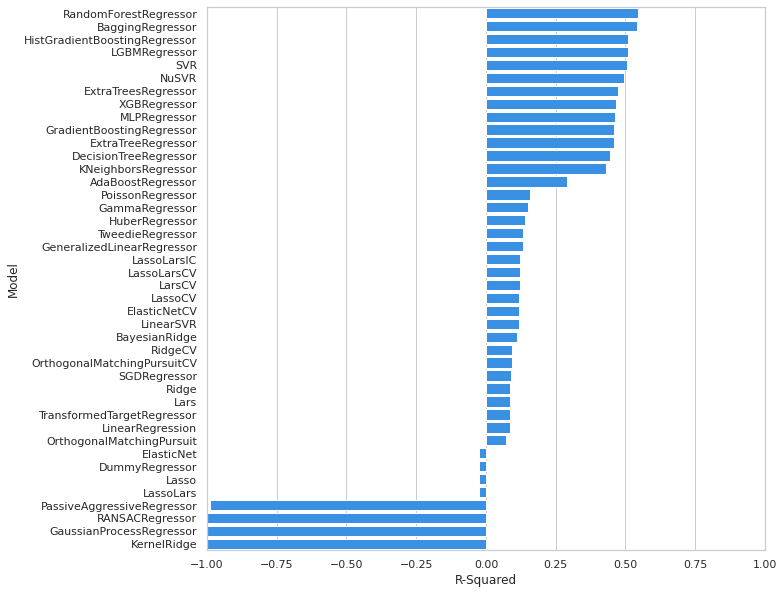

In [11]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='R-Squared', data=train, color='dodgerblue')
ax.set(xlim=(-1, 1))
plt.show()

#### 5.2 Bar plot of **RMSE** values:

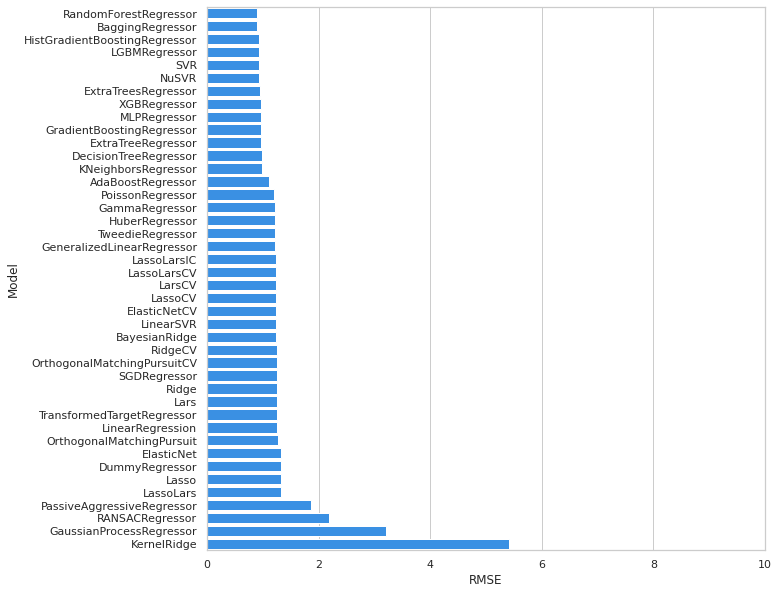

In [12]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='RMSE', data=train, color='dodgerblue')
ax.set(xlim=(0, 10))
plt.show()

#### 5.3 Bar plot of **Calculation Time**:

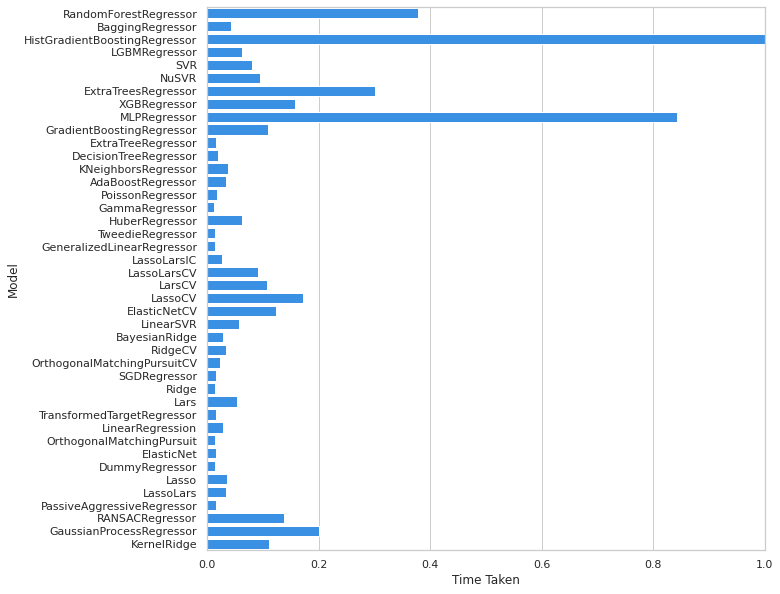

In [13]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='Time Taken', data=train, color='dodgerblue')
ax.set(xlim=(0, 1))
plt.show()

#### 5.4 Interpretation of Visualizations  
Overall, we can see that from the models we have compared we can conclude that the worst performing model would be **Kernel Ridge** with a big error measurement and a low R$^{2}$ value. The best performing model would be the **KNeighbors Regressor**, with the best time performance. With a moderate score of its R$^{2}$ value (0.65) and a relatively adequate measure of its RMSE value.

*** 
### Overview
In this notebook we compared and visualized the results of the most commonly used regressors and landed on 1 regressor that yields the best results - **KNeighbours Regressor**. Our next steps would be to look into optimizing and attempting for final results with the regressor. We will also be looking into **RMT (Random Matrix Theory)** with the **decoy** set we have created. We are also going to be looking into training a neural network (**LSTM**).